# Regression

### Train model

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.utils.data as Data
import itertools
import pickle

fo = open("log.txt", "w")

tasktype='regression'# classification
torch.manual_seed(1)    # reproducible
p=10
x=torch.rand(20000,p)*2-1
X=x.numpy()

### you may select the following groundtruth as you like
# multi 1
# y = X[:,0]*X[:,1] + X[:,2]*X[:,3]*X[:,4]+X[:,5]*X[:,6]*X[:,7]+ X[:,8]*X[:,9] 
# multi 2
# y = np.exp(np.abs(X[:,0]-X[:,1]))*X[:,9]+np.abs(X[:,2]*X[:,3])-(X[:,4]**2)*np.abs(X[:,5])+(X[:,6]*X[:,7])**2+X[:,8]
# multi 3
# y = X[:,0]*X[:,1] + np.abs(X[:,1]+X[:,2]*X[:,3])+X[:,4]*X[:,5]-X[:,5]**2*X[:,6]-np.exp(X[:,7]+ X[:,8]*X[:,9]) 
# F8 (example of node overlapping)
y=X[:,0]*X[:,1]+2**(X[:,2]+X[:,4]+X[:,5])+2**(X[:,2]+X[:,3]+X[:,4]+X[:,6])+np.sin(X[:,6]*np.sin(X[:,7]+X[:,8]))+np.arccos(0.9*X[:,9])

y=torch.from_numpy(y)
if tasktype is 'regression':
    print('task:',tasktype)
    loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss


y=y.reshape(len(y),1)
x_tr,y_tr,x_te,y_te=x[:10000,:],y[:10000,:],x[10000:,:],y[10000:,:]
torch_dataset = Data.TensorDataset(x, y)
BATCH_SIZE=400
loader = Data.DataLoader(
    dataset=torch_dataset,      
    batch_size=BATCH_SIZE,      
    shuffle=True,               
    num_workers=2,              
)


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.hidden3 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden1(x))      # activation function for hidden layer sigmoid
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=p, n_hidden=400, n_output=1)     # define the network #400 1200
print(net)  # net architecture

optimizer= torch.optim.Adam(net.parameters(), betas=(0.9, 0.99))
for t in range(1000):
    prediction = net(x_tr)     # input x and predict based on x
    loss = loss_func(prediction, y_tr)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    #print(t,'loss:',loss)

    if t % 10 == 0:
        teloss = loss_func(net(x_te), y_te)
        print(t,'training loss:',loss,'test loss:',teloss)
        #torch.save(net.state_dict(), 'models/net_params_'+str(t)+'.pkl') 
        string='epoch:'+str(t)+'training loss:'+str(loss)+'test loss:'+str(teloss)+'\n'
        fo.write(string)

fo.close()


<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-1-36e87a054ba9>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if tasktype is 'regression':


task: regression
Net(
  (hidden1): Linear(in_features=10, out_features=400, bias=True)
  (hidden2): Linear(in_features=400, out_features=400, bias=True)
  (hidden3): Linear(in_features=400, out_features=400, bias=True)
  (predict): Linear(in_features=400, out_features=1, bias=True)
)
0 training loss: tensor(21.8620, grad_fn=<MseLossBackward>) test loss: tensor(19.6877, grad_fn=<MseLossBackward>)
10 training loss: tensor(6.4311, grad_fn=<MseLossBackward>) test loss: tensor(5.1118, grad_fn=<MseLossBackward>)
20 training loss: tensor(1.8502, grad_fn=<MseLossBackward>) test loss: tensor(1.3755, grad_fn=<MseLossBackward>)
30 training loss: tensor(0.5939, grad_fn=<MseLossBackward>) test loss: tensor(0.5410, grad_fn=<MseLossBackward>)
40 training loss: tensor(0.5125, grad_fn=<MseLossBackward>) test loss: tensor(0.5418, grad_fn=<MseLossBackward>)
50 training loss: tensor(0.4310, grad_fn=<MseLossBackward>) test loss: tensor(0.4055, grad_fn=<MseLossBackward>)
60 training loss: tensor(0.2948, gra

700 training loss: tensor(0.0025, grad_fn=<MseLossBackward>) test loss: tensor(0.0053, grad_fn=<MseLossBackward>)
710 training loss: tensor(0.0027, grad_fn=<MseLossBackward>) test loss: tensor(0.0058, grad_fn=<MseLossBackward>)
720 training loss: tensor(0.0058, grad_fn=<MseLossBackward>) test loss: tensor(0.0074, grad_fn=<MseLossBackward>)
730 training loss: tensor(0.0025, grad_fn=<MseLossBackward>) test loss: tensor(0.0051, grad_fn=<MseLossBackward>)
740 training loss: tensor(0.0021, grad_fn=<MseLossBackward>) test loss: tensor(0.0050, grad_fn=<MseLossBackward>)
750 training loss: tensor(0.0041, grad_fn=<MseLossBackward>) test loss: tensor(0.0070, grad_fn=<MseLossBackward>)
760 training loss: tensor(0.0023, grad_fn=<MseLossBackward>) test loss: tensor(0.0056, grad_fn=<MseLossBackward>)
770 training loss: tensor(0.0033, grad_fn=<MseLossBackward>) test loss: tensor(0.0052, grad_fn=<MseLossBackward>)
780 training loss: tensor(0.0021, grad_fn=<MseLossBackward>) test loss: tensor(0.0049, g

### Detect interactions analytically. (Hessian matrix is a zero matrix)

detection time: 51.777947425842285


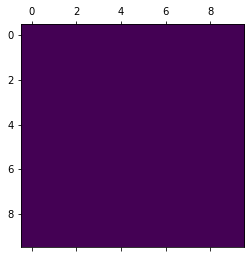

In [2]:

import torch
from torch import Tensor
from torch.autograd import Variable
from torch.autograd import grad
from torch import nn
import time
st=time.time()
torch.manual_seed(623)
cnt=0
aa=0
Hessian=torch.zeros(p,p)
grad1=torch.zeros(1,p)

for j in range(100):
        xeval = Variable(x_tr[j,:], requires_grad=True)
        xeval=xeval.reshape(1,p)
        f = net(xeval)
        x_1grad, = grad(f, xeval, create_graph=True)
        grad1=grad1+(x_1grad)**2
        x_2grad0, = grad(x_1grad[0,0], xeval, create_graph=True)

        for i in range(p-1):
            x_2grad1, = grad(x_1grad[0,i+1], xeval, create_graph=True)
            x_2grad0 = torch.cat((x_2grad0, x_2grad1), dim=0)
            cnt=cnt+1
        Hessian=Hessian+torch.abs(x_2grad0) 
        aa=Hessian/cnt

print('detection time:',time.time()-st)
plt.matshow(np.abs(aa.detach().numpy()))

### Detect interactions Numerically (brute force, pull each arm 100 times)

In [3]:
def one_hot(i,p):
    '''
    generate a p-dimensional one_hot vector, i-th element is 1
    '''
    
    batch_size=1
    # Dummy input that HAS to be 2D for the scatter (you can use view(-1,1) if needed)
    y = torch.LongTensor([[i]])
    # One hot encoding buffer that you create out of the loop and just keep reusing
    y_onehot = torch.FloatTensor(batch_size, p)
    #print(y_onehot)
    # In your for loop
    y_onehot.zero_()
    y_onehot.scatter_(1, y, 1)
    return y_onehot

6.42970871925354


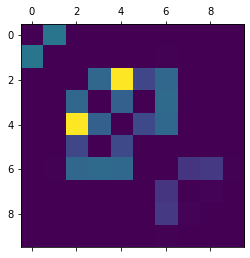

In [4]:
import torch
from torch import Tensor
from torch.autograd import Variable
from torch.autograd import grad
from torch import nn
import time
st=time.time()
torch.manual_seed(623)
cnt=0
aa=0
Hessian=torch.zeros(p,p)
Firstorder=torch.zeros(1,p)
Firstordertemp=torch.zeros(1,p)
Hessiantemp=torch.zeros(p,p)
grad1=torch.zeros(1,p)
delta=1 # h=k=1 

for j in range(100):

        xeval = Variable(x_tr[j,:], requires_grad=True)
        xeval=xeval.reshape(1,p)

        
        for i in range(p):                        
            for k in range(i):
                f0 = net(xeval-one_hot(i,p)*delta-one_hot(k,p)*delta)
                fi =net(xeval+one_hot(i,p)*delta-one_hot(k,p)*delta)
                fik =net(xeval+one_hot(i,p)*delta+one_hot(k,p)*delta)
                fk=net(xeval+one_hot(k,p)*delta-one_hot(i,p)*delta)
                
                Hessiantemp[i,k]=((fik-fi-fk+f0)/delta**2/4)**2
                Hessiantemp[k,i]=Hessiantemp[i,k]

        cnt=cnt+1
        Hessian=Hessian+torch.abs(Hessiantemp) 
        aa=Hessian/cnt

print(time.time()-st)
plt.matshow(np.abs(aa.detach().numpy()))


 # Graph and spectral clustering

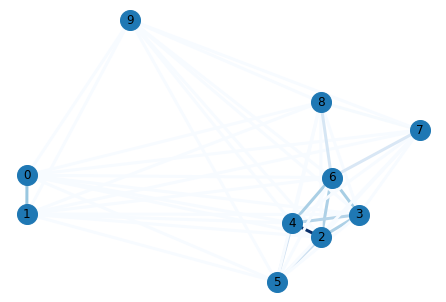

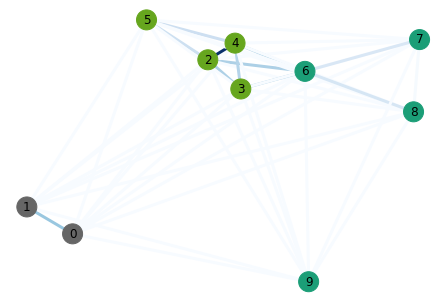

In [5]:
import networkx as nx
score=np.abs(aa.detach().numpy())
G=nx.from_numpy_matrix(score)
color=[]
for i in G.edges:
    color.append(score[i[0],i[1]])
plt.figure(1)
nx.draw(G, 
        with_labels=True,
        node_size=400, 
        edge_color=color,        
        width=3, 
        cmap=plt.cm.Dark2, 
        edge_cmap=plt.cm.Blues
       )  
plt.show()


#np.max(score)*0.1
#score[score<np.max(score)*0.1]=0
adMatrix=score


from sklearn.cluster import KMeans
p=10
k=3

#score[score<np.max(score)*0.1]=0
adMatrix=score
aaaa=np.any(adMatrix,axis=1)
def calLaplacianMatrix(adjacentMatrix):

    # compute the Degree Matrix: D=sum(A)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)

    # compute the Laplacian Matrix: L=D-A
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix

    # normailze
    # D^(-1/2) L D^(-1/2)
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)

def spKmeans(H,k):
    sp_kmeans = KMeans(n_clusters=k).fit(H)
    return sp_kmeans.labels_

Laplacian=calLaplacianMatrix(adMatrix[aaaa][:,aaaa])
x, V = np.linalg.eig(Laplacian)

x = zip(x, range(len(x)))
x = sorted(x, key=lambda x:x[0])

H = np.vstack([V[:,i] for (v, i) in x[:k]]).T

label111=spKmeans(H,k)

nodecolormap=np.ones(p)
nodecolormap[np.where(aaaa==False)]=range(k,k+len(np.where(aaaa==False)[0])) #nodes with degree=1
nodecolormap[np.where(aaaa==True)]=label111
#
plt.figure(2)
nx.draw(G, 
        with_labels=True,
        node_size=400, 
        node_color=nodecolormap,
        edge_color=color,        
        width=3, 
        cmap=plt.cm.Dark2, 
        edge_cmap=plt.cm.Blues
       )  
plt.savefig('figure_name.pdf',bbox_inches='tight',dpi='figure',pad_inches=0.1) # figure_name could be multi_1,2,3

plt.show()

# Detecting 2-way/3-way/4-way interactions via UCB

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[0, 1]
[0, 3]
[0, 4]
[0, 6]
[1, 4]
[1, 6]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[3, 4]
[3, 5]
[3, 6]
[4, 5]
[4, 6]
[5, 6]
[6, 7]
[6, 8]
[6, 9]
[7, 8]
[0, 1, 4]
[0, 1, 6]
[0, 3, 4]
[0, 3, 6]
[0, 4, 6]
[1, 4, 6]
[2, 3, 4]
[2, 3, 5]
[2, 3, 6]
[2, 4, 5]
[2, 4, 6]
[2, 5, 6]
[3, 4, 5]
[3, 4, 6]
[3, 5, 6]
[4, 5, 6]
[6, 7, 8]
[0, 1, 4, 6]
[0, 3, 4, 6]
[2, 3, 4, 5]
[2, 3, 4, 6]
[2, 3, 5, 6]
[2, 4, 5, 6]
[3, 4, 5, 6]
[2, 3, 4, 5, 6]
All 3-cliques:  [[0, 1, 4], [0, 1, 6], [0, 3, 4], [0, 3, 6], [0, 4, 6], [1, 4, 6], [2, 3, 4], [2, 3, 5], [2, 3, 6], [2, 4, 5], [2, 4, 6], [2, 5, 6], [3, 4, 5], [3, 4, 6], [3, 5, 6], [4, 5, 6], [6, 7, 8]]
All 4-cliques:  [[0, 1, 4, 6], [0, 3, 4, 6], [2, 3, 4, 5], [2, 3, 4, 6], [2, 3, 5, 6], [2, 4, 5, 6], [3, 4, 5, 6]]


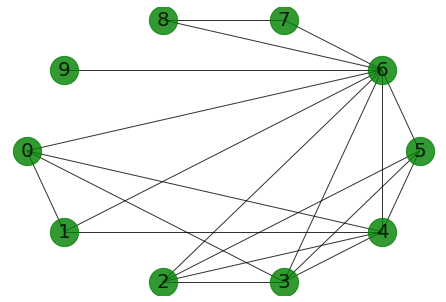

In [6]:
adMatrix # cut off
def cutoff(adj,k):
    adjflatten=adj.flatten()
    return adj>=adjflatten[np.argsort(adjflatten)[-k*2]]
Gcut=nx.from_numpy_matrix(cutoff(adMatrix,20))
pos=nx.shell_layout(Gcut)
nx.draw(Gcut,pos,with_labels=True,node_size=800,node_color='g',alpha=0.8,font_size=20)
enum=nx.enumerate_all_cliques(Gcut)

Tway_candid=[]  # save all 3-cliques
Fway_candid=[]  # save all 4-cliques
for i in enum:
    print(i)
    if len(i)==3:
        Tway_candid.append(i)
    if len(i)==4:
        Fway_candid.append(i)
print('All 3-cliques: ', Tway_candid) 
print('All 4-cliques: ', Fway_candid)

In [7]:
from UCBtools import *
detect_Hessian_UCB(net,x_tr,20) # detected top 20 pairwise (2-way) interactions sorted in order of detection

start dectecting
Initialization done! initial try3times
chosen arm: 18 strength: 24.189719043970108 iteration: 99
chosen arm: 17 strength: 8.37087256940703 iteration: 323
chosen arm: 0 strength: 8.937511752446492 iteration: 394
chosen arm: 24 strength: 8.178631871044637 iteration: 415
chosen arm: 26 strength: 9.644215104756533 iteration: 431
chosen arm: 31 strength: 7.949677372798323 iteration: 522
chosen arm: 30 strength: 5.389096221134826 iteration: 690
chosen arm: 19 strength: 5.4125548561165715 iteration: 713
chosen arm: 20 strength: 9.318034993277656 iteration: 717
chosen arm: 40 strength: 3.627014515797297 iteration: 826
chosen arm: 39 strength: 3.274010548988978 iteration: 826
chosen arm: 9 strength: 0.05535197053225778 iteration: 1108
chosen arm: 35 strength: 0.049582512446942034 iteration: 1116
chosen arm: 34 strength: 0.04849371470529149 iteration: 1210
chosen arm: 11 strength: 0.06256636240631752 iteration: 1311
chosen arm: 33 strength: 0.04775817237976906 iteration: 1446
ch

([array([2, 4]),
  array([2, 3]),
  array([0, 1]),
  array([3, 4]),
  array([3, 6]),
  array([4, 6]),
  array([4, 5]),
  array([2, 5]),
  array([2, 6]),
  array([6, 8]),
  array([6, 7]),
  array([1, 2]),
  array([5, 6]),
  array([4, 9]),
  array([1, 4]),
  array([4, 8]),
  array([1, 6]),
  array([3, 5]),
  array([0, 3]),
  array([1, 5])],
 3.5517849922180176)

In [8]:
# Then we check if those candidates are 3-way interactions
detect_3rd_UCB(net,x_tr,Tway_candid,6)

start dectecting
Initialization done! initial try3times
chosen arm: 8 strength: 0.04967278783714089 iteration: 102
chosen arm: 10 strength: 0.053132130979345396 iteration: 194
chosen arm: 6 strength: 0.042306365093002875 iteration: 210
chosen arm: 13 strength: 0.03151366362362751 iteration: 225
chosen arm: 9 strength: 0.021623333916068077 iteration: 225
chosen arm: 16 strength: 0.005977118144276876 iteration: 329
time: 1.283839225769043


([array([2, 3, 6]),
  array([2, 4, 6]),
  array([2, 3, 4]),
  array([3, 4, 6]),
  array([2, 4, 5]),
  array([6, 7, 8])],
 1.283839225769043)

In [9]:
Fway_candid

[[0, 1, 4, 6],
 [0, 3, 4, 6],
 [2, 3, 4, 5],
 [2, 3, 4, 6],
 [2, 3, 5, 6],
 [2, 4, 5, 6],
 [3, 4, 5, 6]]

### You may see {2,3,4,6} is the only 4-clique such that {2,3,6},{2,4,6},{3,4,6},{2,3,4} all exist.

In [10]:
detect_4th_UCB(net,x_tr,Fway_candid,4)

start dectecting
Initialization done! initial try3times
chosen arm: 3 strength: 0.7589151919118982 iteration: 164
chosen arm: 2 strength: 0.7992090514843585 iteration: 205
chosen arm: 5 strength: 0.4865295314873218 iteration: 300
chosen arm: 4 strength: 0.06410021153935304 iteration: 396
time: 3.0254740715026855


([array([2, 3, 4, 6]),
  array([2, 3, 4, 5]),
  array([2, 4, 5, 6]),
  array([2, 3, 5, 6])],
 3.0254740715026855)